---
title: Sampling (from Spring 2025)
format:
  html:
    toc: true
    toc-depth: 5
    toc-location: right
    code-fold: false
    theme:
      - cosmo
      - cerulean
    callout-icon: false
jupyter:
  jupytext:
    text_representation:
      extension: .qmd
      format_name: quarto
      format_version: '1.0'
      jupytext_version: 1.16.1
  kernelspec:
    display_name: data100quarto
    language: python
    name: python3
---

::: {.callout-note collapse="false"}
## Learning Outcomes

- Understand how to appropriately collect data to help answer a question. 

:::

In data science, understanding characteristics of a population starts with having quality data to investigate. While it is often impossible to collect all the data describing a population, we can overcome this by properly sampling from the population. In this note, we will discuss appropriate techniques for sampling from populations. 

![Lifecycle diagram](images/data_life_cycle_sampling.png)


## Censuses and Surveys

In general: a **census** is “a complete count or survey of a **population**, typically recording various details of **individuals**.”
An example is the U.S. Decennial Census which was held in April 2020. It counts *every person* living in all 50 states, DC, and US territories, not just citizens. Participation is required by law (it is mandated by the U.S. Constitution). Important uses include the allocation of Federal funds, congressional representation, and drawing congressional and state legislative districts. The census is composed of a **survey** mailed to different housing addresses in the United States.

A **survey** is a set of questions. An example is workers sampling individuals and households. What is asked and how it is asked can affect how the respondent answers or even whether or not they answer in the first place.

While censuses are great, it is often very difficult and expensive to survey everyone in a population. Imagine the amount of resources, money, time, and energy the U.S. spent on the 2020 Census. While this does give us more accurate information about the population, it's often infeasible to execute. Thus, we usually survey a subset of the population instead.

A **sample** is (usually) a subset of the population that is often used to make inferences about the population. If our sample is a good representation of our population, then we can use it to glean useful information at a lower cost. That being said, how the sample is drawn will affect the reliability of such inferences. Two common sources of error in sampling are **chance error**, where random samples can vary from what is expected in any direction, and  **bias**, which is a systematic error in one direction. Biases can be the result of many things, for example, our sampling scheme or survey methods. 

Let's define some useful vocabulary:

* **Population**: The group that you want to learn something about.
    * **Individuals** in a population are not always people. Other populations include bacteria in your gut (sampled using DNA sequencing), trees of a certain species, small businesses receiving a microloan, or published results in an academic journal or field.
* **Sampling Frame**: The list from which the sample is drawn. 
    * For example, if sampling people, then the sampling frame is the set of all people that could possibly end up in your sample.
* **Sample**: Who you actually end up sampling. The sample is therefore a subset of your *sampling frame*.

While ideally, these three sets would be exactly the same, they usually aren't in practice. For example, there may be individuals in your sampling frame (and hence, your sample) that are not in your population. And generally, sample sizes are much smaller than population sizes.

![Sampling_Frames](images/samplingframe.png)

## Sampling: A Case Study

The following case study is adapted from *Statistics* by Freedman, Pisani, and Purves, W.W. Norton NY, 1978.

In 1936, President Franklin D. Roosevelt (Democratic) went up for re-election against Alf Landon (Republican). As is usual, **polls** were conducted in the months leading up to the election to try and predict the outcome. The *Literary Digest* was a magazine that had successfully predicted the outcome of 5 general elections coming into 1936. In their polling for the 1936 election, they sent out their survey to 10 million individuals whom they found from phone books, lists of magazine subscribers, and lists of country club members. Of the roughly 2.4 million people who filled out the survey, only 43\% reported they would vote for Roosevelt; thus, the *Digest* predicted that Landon would win.

On election day, Roosevelt won in a landslide, winning 61\% of the popular vote of about 45 million voters. How could the *Digest* have been so wrong with their polling?

It turns out that the *Literary Digest* sample was not representative of the population. Their sampling frame of people found in phone books, lists of magazine subscribers, and lists of country club members were more affluent and tended to vote Republican. As such, their sampling frame was inherently skewed in Landon's favor. The *Literary Digest* completely overlooked the lion's share of voters who were still suffering through the Great Depression. Furthermore, they had a dismal response rate (about 24\%); who knows how the other non-respondents would have polled? The *Digest* folded just 18 months after this disaster.

At the same time, George Gallup, a rising statistician, also made predictions about the 1936 elections. Despite having a smaller sample size of “only” 50,000 (this is still more than necessary; more when we cover the Central Limit Theorem), his estimate that 56\% of voters would choose Roosevelt was much closer to the actual result (61\%). Gallup also predicted the *Digest*'s prediction within 1\% with a sample size of only 3000 people by anticipating the *Digest*'s affluent sampling frame and subsampling those individuals. 

## Sampling Errors

So what's the moral of the story? Samples, while convenient, are subject to chance error and **bias**. Election polling, in particular, can involve many sources of bias. To name a few:

* **Selection bias** systematically excludes (or favors) particular groups. 
    * Example: the Literary Digest poll excludes people not in phone books.
    * How to avoid: Randomly sample, and improve overlap of sampling  frame and population.
* **Response bias** occurs because people don't always respond truthfully. Survey designers pay special detail to the nature and wording of questions to avoid this type of bias.
    * Example: Illegal immigrants might not answer truthfully when asked citizenship questions on the census survey.
    * How to avoid: Improve questions. Lots of response bias [subtypes + prevention methods](https://en.wikipedia.org/wiki/Response_bias#:~:text=%5B7%5D-,Types,-%5Bedit%5D).
* **Non-response bias** occurs because people don't always respond to survey requests, which can skew responses. 
    * Example: Only 2.4m out of 10m people responded to the *Literary Digest*'s poll.
    * How to avoid: Increase response rate. For example, reduce the number and length of questions, incentivize completion, and follow up.

## Types of Sampling

When sampling, it is essential to focus on the quality of the sample rather than the quantity of the sample. A huge sample size does not fix a bad sampling method. Our main goal is to gather a sample that is representative of the population it came from. In this section, we'll explore the different types of sampling and their pros and cons. 

A **convenience sample** is whatever you can get ahold of; this type of sampling is *non-random*. Note that haphazard sampling is not necessarily random sampling; there are many potential sources of bias.

In a **probability sample**, we provide the **chance** that any specified **set** of individuals will be in the sample (individuals in the population can have different chances of being selected; they don't all have to be uniform), and we sample at random based off this known chance. For this reason, probability samples are also called **random samples**. The randomness provides a few benefits: 

* Because we know the source probabilities, we can **measure the errors**.
* Sampling at random gives us a more representative sample of the population, which **reduces bias**. (Note: this is only the case when the probability distribution we're sampling from is accurate. Random samples using "bad" or inaccurate distributions can produce biased estimates of population quantities.)
* Probability samples allow us to **estimate** the **bias** and **chance error**, which helps us **quantify uncertainty** (more in a future lecture).

The real world is usually more complicated, and we often don't know the initial probabilities. For example, we do not generally know the probability that a given bacterium is in a microbiome sample or whether people will answer when Gallup calls landlines. That being said, still we try to model probability sampling to the best of our ability even when the sampling or measurement process is not fully under our control.
    
A few common random sampling schemes:

* A **uniform random sample with replacement** is a sample drawn **uniformly** at random **with** replacement.
    * Random doesn’t always mean “uniformly at random,” but in this specific context, it does.
    * Some individuals in the population might get picked more than once.
* A **simple random sample (SRS)** is a sample drawn **uniformly** at random **without** replacement.
    * Every individual (and subset of individuals) has the same chance of being selected from the sampling frame.
    * Every pair has the same chance as every other pair.
    * Every triple has the same chance as every other triple.
    * And so on.
* A **stratified random sample**, where random sampling is performed on strata (specific groups), and the groups together compose a sample.

### Example Scheme 1: Probability Sample
Suppose we have 3 TA's (**A**rman, **B**oyu, **C**harlie):
I decide to sample 2 of them as follows:

* I choose A with probability 1.0
* I choose either B or C, each with a probability of 0.5.

We can list all the possible outcomes and their respective probabilities in a table: 

| Outcome | Probability |
| --- | ----------- |
| {A, B} | 0.5 |
| {A, C} | 0.5 |
| {B, C} | 0 |

This is a **probability sample** (though not a great one). Of the 3 people in my population, I know the chance of getting each subset. Suppose I’m measuring the average distance TAs live from campus.

* This scheme does not see the entire population!
* My estimate using the single sample I take has some chance error depending on if I see AB or AC.
* This scheme is biased towards A’s response.




### Example Scheme 2: Simple Random Sample
Consider the following sampling scheme:

* A class roster has 1100 students listed alphabetically.
* Pick one of the first 10 students on the list at random (e.g. Student 8).
* To create your sample, take that student and every 10th student listed after that (e.g. Students 8, 18, 28, 38, etc.).

<details>
  <summary>Is this a probability sample?</summary>
  
  Yes. For a sample [n, n + 10, n + 20, …, n + 1090], where 1 <= n <= 10, the probability of that sample is 1/10. Otherwise, the probability is 0. 
  
  Only 10 possible samples!
</details>

<details>
  <summary>Does each student have the same probability of being selected?</summary>
  
  Yes. Each student is chosen with a probability of 1/10.
</details>

<details>
  <summary>Is this a simple random sample?</summary>
  
  No. The chance of selecting (8, 18) is 1/10; the chance of selecting (8, 9) is 0.
</details>

### Example Scheme 3: Stratified Random Sampling
Suppose you want to interview a representative sample of **12 students** enrolled in Data 100.

- Suppose there are **1,200 students** in Data 100.
- **100 students** are graduate students. The remaining **1,100** are undergraduates.
- I conduct an SRS with **n=1** on the 100 graduate students, and an SRS with **n=11** on the 1,100 undergraduates.

<details>
<summary>Does each student have the same probability of being selected?</summary>

**Yes**. Each student is chosen with probability 1/100

</details>

<details>
<summary>Is there any benefit or downside to sampling this way?</summary>

**Yes, a benefit!** We have **guaranteed proportional representation** of undergrads and grad students. In other words, we have **reduced chance error** (i.e., variance).

</details>

## Demo: The 1936 Presidential Election Results
Let's start with the real election results from the 1936 election.

* Each row of `votes` represents a single voter.
* `voted_dem` is 0/1 variable indicating whether the voter voted for Franklin D. Roosevelt, who was the Democratic candidate in 1936. If 0, the voter voted for Alf Landon, the Republican candidate.

Votes for other parties are excluded from this dataset.

In [1]:
#| code-fold: true
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import zipfile

sns.set_theme(style='darkgrid', font_scale = 1.5,
              rc={'figure.figsize':(7,5)})

In [2]:
with zipfile.ZipFile("data/1936_votes.zip", 'r') as z:
    with z.open("1936_votes.csv") as csv_file:
        votes = pd.read_csv(csv_file)

votes.head()

,voted_dem
0,1
1,1
2,0
3,1
4,1


How many votes were cast for either Roosevelt or Landon in 1936?

In [3]:
len(votes)

44430549

What fraction of voters voted for Roosevelt, the Democratic candidate?

In [4]:
votes['voted_dem'].sum() / len(votes)

0.6245897614274358

> But wait, don't the slides say that Roosevelt won 61% of the vote?
>
> Yes! But, he won 61% of **all** votes. If we filter to just the voters who
> voted for Roosevelt or Landon, Roosevelt won 62.5% of votes.

Useful tip: The mean of a 0/1 column is the same as the proportion of values that are 1.

In [5]:
votes['voted_dem'].mean()

0.6245897614274358

Of the **44,430,549** voters who voted for either Roosevelt or Landon, **62.5\%** voted for Roosevelt.

### 🎩 Simple Random Sample (SRS)

Note: An SRS is sometimes called a "names in a hat" sample, since it's a lot like putting each observation on a slip of paper, putting all the slips in a big hat, and then randomly drawing slips one at a time.

If we were to take a simple random sample of just 1,000 voters and calculate the proportion who planned to vote for Roosevelt, how close would we be to 62.5%?

In [6]:
votes['voted_dem'].sample(1000).mean()

0.607

Note that the cell above is a little slow, since we're sampling from a `DataFrame` with almost 45 million rows.

We can speed up the sampling using `NumPy`:

In [7]:
# Construct a random number generator object.
# No need to be familiar with using NumPy this way in Data 100!
rng = np.random.default_rng()

n_votes = len(votes)

# Generate 1000 random integers from 0 to (number of votes - 1)
idx = rng.integers(low=0, high=n_votes-1, size=1000)

votes['voted_dem'].iloc[idx].mean()

0.596

Both of the estimates above are pretty close to 62.5%! They are much closer than the estimate from the Literary Digest poll, which predicted that 43% of votes would go to Roosevelt.

This is no fluke! If we repeat this over and over, we tend to hover around 62.5%. 

In [8]:
for _ in range(10):
  idx = rng.integers(low=0, high=n_votes-1, size=1000)
  print(votes['voted_dem'].iloc[idx].mean())

0.644
0.602
0.607
0.625
0.624
0.645
0.643
0.62
0.615
0.611


Let's randomly generate 10,000 estimates:

In [9]:
nrep = 10000   # number of simulations
n = 1000       # size of our sample
results = []   # list to store the sampling results

for i in range(0, nrep):
    idx = rng.integers(low=0, high=n_votes, size=1000)
    results.append(votes['voted_dem'].iloc[idx].mean())

# First 10 simulated sample proportions
results[:10]

[0.622, 0.649, 0.614, 0.61, 0.618, 0.611, 0.627, 0.589, 0.615, 0.629]

Plotting our estimates with KDE:

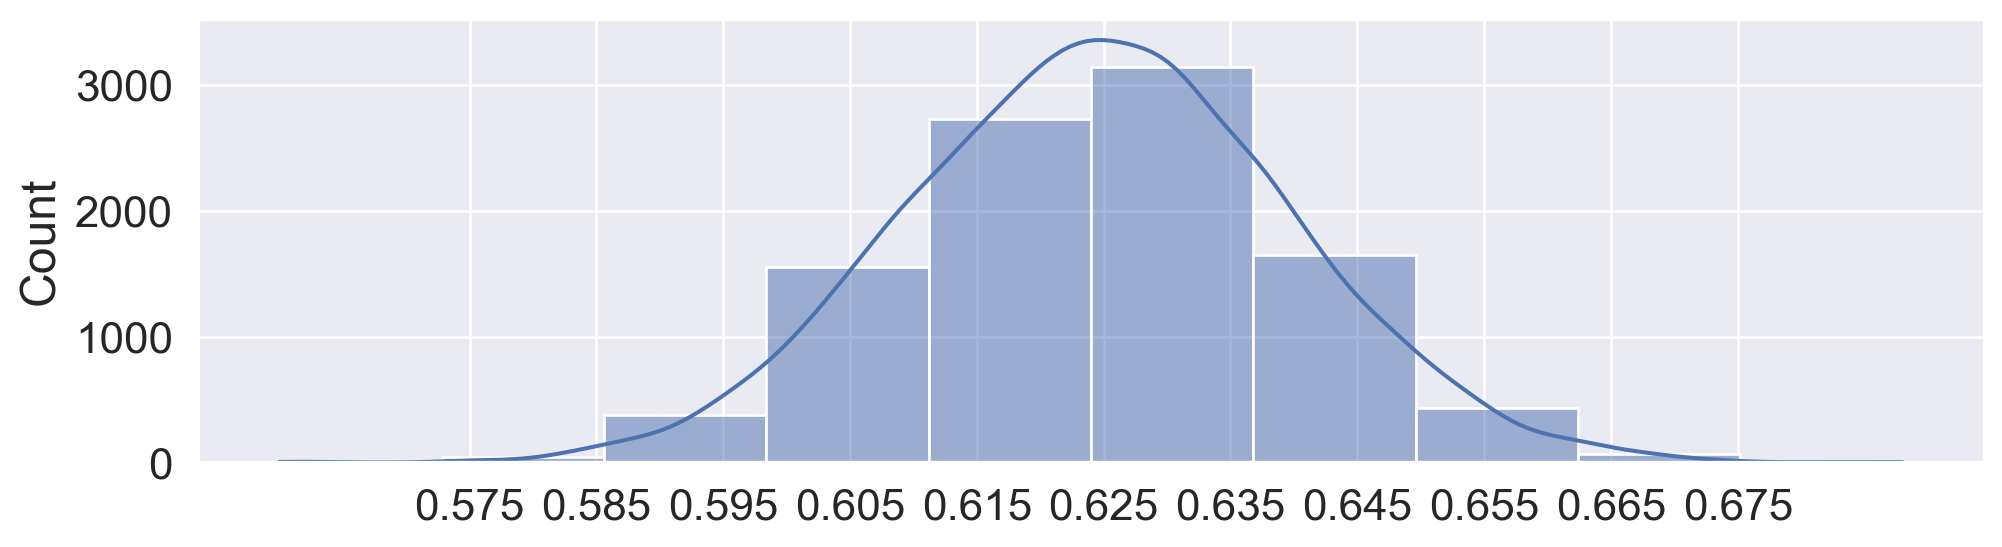

In [10]:
plt.figure(figsize=(12, 3))
p = sns.histplot(x=results, kde=True, bins=10)

# Make x-axis centered at 0.625 with 0.01 intervals
p.set_xticks(np.arange(0.625 - 5 * 0.01, 0.625 + 5 * 0.01, 0.01));

We get an approximate normal distribution centered around 62.5%, with most of the mass of the distribution (say, 95\% of the mass) within about 3 percentage points (0.03) on each side.

As it turns out, with a sample size of 1000, our estimate of the proportion of voters supporting Roosevelt has a margin of error of about 3 percentage points (3pp) at a 95\% confidence level (CL), so long as we take a simple random sample (SRS) of actual voters. 

- Note: You tend to see 3pp and 95% CL quite a lot in political polling! 

We'll learn what these values mean and how to calculate them when we (re)learn the Central Limit Theorem later in the semester.

## Demo: Revisiting the 1936 Literary Digest Poll

The `poll` `DataFrame` contains a summary of the 1936 Literary Digest Poll, along with polling results and actual election results from 1932 and 1936.

* Each row of `poll` represents a U.S. state.
* `state`: name of the U.S. state.
* `electoral_votes`: # electoral votes allocated to the given state.
* `actual_dem_1936`: # votes for Roosevelt (the Democratic candidate) in 1936.
* `actual_rep_1936`: # votes for Landon (the Republican candidate) in 1936.
* `ld_dem_1936`: # Literary Digest respondents who planned to vote for Roosevelt in 1936.
* `ld_rep_1936`: # Literary Digest respondents who plannted to vote for Landon in 1936.

Literary Digest also had a 1932 poll! We will use this data for post-stratification:
* `actual_dem_1932`: # votes for the Democratic candidate in 1932.
* `actual_rep_1932`: # votes for the Republican candidate in 1932.
* `ld_dem_1932`: # of 1936 Literary Digest respondents who voted for the Democratic candidate in 1932.
* `ld_rep_1932`: # of 1936 Literary Digest respondents who voted for Republican candidate in 1932.

Note: Votes from parties other than Democratic and Republican are excluded from this dataset.

In [11]:
poll = pd.read_csv('data/literary-digest-summary-data.csv')
poll.head()

,state,electoral_votes,actual_dem_1936,actual_rep_1936,ld_rep_1936,ld_dem_1936,actual_dem_1932,actual_rep_1932,ld_dem_1932,ld_rep_1932
0,Alabama,11,238196,35358,3060,10082,207910,34675,9828,1589
1,Arizona,3,86722,33433,2337,1975,79264,36104,2202,1679
2,Arkansas,9,146765,32049,2724,7608,189602,28467,7608,1566
3,California,22,1766836,836431,89516,77245,1324157,847902,69720,80525
4,Colorado,6,295021,181267,15949,10025,250877,189617,9970,13619


As a sanity check, let's make sure we have the same number of votes as the first dataset (44,430,549):

In [12]:
poll['actual_dem_1936'].sum() + poll['actual_rep_1936'].sum()

44430549

Let's also check that we get the reported Literary Digest prediction of 43% for Roosevelt.

- Remember, Roosevelt received 62.5% of the actual vote.

In [13]:
poll['ld_dem_1936'].sum() / (poll['ld_dem_1936'].sum() + poll['ld_rep_1936'].sum())

0.4289439704056572

### 🥞 Post-stratification with Literary Digest responses from 1932 and 1936

Using **post-stratification**, let's see if we can improve the Literary Digest poll result using the **same information available to Literary Digest in 1936**. 

- In other words, without using data from the future!

Recall the steps of post-stratification:

1. Divide the sample and population into cells defined by chosen characteristics.
2. Calculate the overall response in each sample cell.
3. Aggregate over sample cells, reweighting by the size of the corresponding population cell.

**Sample**: Responses to the Literary Digest poll from 1932, among 1936 poll respondents

**Population**: The actual election outcomes in 1932

**Cells**: Every combination of state and political party

> Wait, aren't we interested in the 1936 Literary Digest poll?
> 
> - Yes! But, we can use responses from the older 1932 poll and 1932 election results to get our **sample cell weights**, and then use these weights to turn the 1936 poll results into a prediction of the 1936 election results.
>
> - Note that this approach assumes that over- and under-representation of voters among the poll respondents in state and party is the same in 1932 and 1936!

Let's start with step 1. We divide our population and sample into cells defined by each combination of **state** and **choice of party in 1932**:

- Cell 1: Alabama + Republican in 1932
- Cell 2: Alabama + Democratic in 1932
- Cell 3: Arizona + Republican in 1932
- Cell 4: Arizona + Democratic in 1932
- ...

> Note: Alaska and Hawaii were not U.S. states until after 1936.

The population cells are already in `polls`: `actual_dem_1932` and `actual_rep_1932` provide the actual vote counts for each party and state in 1932.

The sample cells are also in `polls`: `ld_dem_1932` and `ld_rep_1932` provide the number of responses to the 1932 Literary Digest poll, among 1936 poll respondents, for each party.

Let's make the **big** assumption that respondents in `ld_dem_1932` are representative of all voters in `actual_dem_1932` for each state, and the same for `ld_rep_1932` and `actual_rep_1932`.

- In other words, we claim that response rates and outreach for Democrats and Republicans from each state in 1932 can differ, but ultimately **poll respondents from a particular party+state combination are representative of actual voters for each party+state combination**.

- Then, we can calculate the **reweighting factor**, or how over- or under-represented poll respondents are relative to actual voters.

- All we need to do is divide the actual vote counts by the corresponding number of respondents, for each combination of party and state.

In [14]:
poll['dem_reweight_factor'] = poll['actual_dem_1932'] / poll['ld_dem_1932']
poll['rep_reweight_factor'] = poll['actual_rep_1932'] / poll['ld_rep_1932']
poll.tail()

,state,electoral_votes,actual_dem_1936,actual_rep_1936,ld_rep_1936,ld_dem_1936,actual_dem_1932,actual_rep_1932,ld_dem_1932,ld_rep_1932,dem_reweight_factor,rep_reweight_factor
43,Virginia,11,234980,98336,10223,16783,203979,89637,16194,6817,12.595961,13.149039
44,Washington,8,459579,206892,21370,15300,353260,208645,16223,17122,21.775257,12.185784
45,West Virginia,8,502582,325358,13660,10235,405124,330731,10818,11338,37.449066,29.170136
46,Wisconsin,12,802984,380828,33796,20781,707410,347741,24073,25731,29.386034,13.514477
47,Wyoming,3,62624,38739,2526,1533,54370,39583,1654,2072,32.871826,19.103764


Note that `dem_reweight_factor` is about 36 for Arizona.

- In other words, there were 36 times as many Democratic voters in Arizona than Democratic poll respondents.

Similarly, `rep_reweight_factor` is about 21.5 for Arizona.

- So, Democratic voters are **underrepresented** in the 1932 Literary Digest poll responses, relative to Republican voters.

- Based on the Republican bias in the Literary Digest sample discussed in lecture (i.e., wealthier folks with phones, cars, and magazines), this is expected!

Next, we apply these same weights to inflate the 1936 poll results into vote predictions.

- Again, note that this approach assumes over- and under-representation patterns are the same in the 1932 and 1936 polls!

In [15]:
poll['pred_dem_1936'] = round(poll['ld_dem_1936'] * poll['dem_reweight_factor'])
poll['pred_rep_1936'] = round(poll['ld_rep_1936'] * poll['rep_reweight_factor'])
poll.head()

,state,electoral_votes,actual_dem_1936,actual_rep_1936,ld_rep_1936,ld_dem_1936,actual_dem_1932,actual_rep_1932,ld_dem_1932,ld_rep_1932,dem_reweight_factor,rep_reweight_factor,pred_dem_1936,pred_rep_1936
0,Alabama,11,238196,35358,3060,10082,207910,34675,9828,1589,21.154864,21.821901,213283.0,66775.0
1,Arizona,3,86722,33433,2337,1975,79264,36104,2202,1679,35.996367,21.503276,71093.0,50253.0
2,Arkansas,9,146765,32049,2724,7608,189602,28467,7608,1566,24.921399,18.178161,189602.0,49517.0
3,California,22,1766836,836431,89516,77245,1324157,847902,69720,80525,18.992499,10.529674,1467076.0,942574.0
4,Colorado,6,295021,181267,15949,10025,250877,189617,9970,13619,25.163190,13.922975,252261.0,222058.0


Finally, let's calculate the proportion of **predicted** votes that are allocated to Roosevelt in 1936.

- Remember that Roosevelt received 62.5% of the **actual** vote in 1936. 

In [16]:
poll['pred_dem_1936'].sum() / (poll['pred_dem_1936'].sum() + poll['pred_rep_1936'].sum())

0.5422251022375592

54% is a majority! Using post-stratification, we have shifted the Literary Digest prediction of a Roosevelt loss with 43% of the vote to a (correct) Roosevelt win with 54%. 

- There is no cheating here; we used the same data available to Literary Digest in 1936.

- Note that post-stratification is not perfect. We are still off by almost 10 percentage points. But, we've moved in the right direction.

## 🎁 Bonus: Follow Up Improvements

As a follow-up exercise, we can compare the predicted 1936 vote totals to the actual 1932 vote totals.

- Then, we could apply a **correction factor** to change the predicted number of 1936 votes to be in line with the total number of votes in 1932.

- This exercise assumes that the total number of votes cast in 1932 would be the same in 1936, but the poll response rates and outreach might change between 1932 and 1936.

In [17]:
poll['pred_total_1936'] = poll['pred_dem_1936'] + poll['pred_rep_1936']
poll['actual_total_1932'] = poll['actual_dem_1932'] + poll['actual_rep_1932']
poll['correction_factor'] = poll['actual_total_1932'] / poll['pred_total_1936']
poll.head()

,state,electoral_votes,actual_dem_1936,actual_rep_1936,ld_rep_1936,ld_dem_1936,actual_dem_1932,actual_rep_1932,ld_dem_1932,ld_rep_1932,dem_reweight_factor,rep_reweight_factor,pred_dem_1936,pred_rep_1936,pred_total_1936,actual_total_1932,correction_factor
0,Alabama,11,238196,35358,3060,10082,207910,34675,9828,1589,21.154864,21.821901,213283.0,66775.0,280058.0,242585,0.866196
1,Arizona,3,86722,33433,2337,1975,79264,36104,2202,1679,35.996367,21.503276,71093.0,50253.0,121346.0,115368,0.950736
2,Arkansas,9,146765,32049,2724,7608,189602,28467,7608,1566,24.921399,18.178161,189602.0,49517.0,239119.0,218069,0.911969
3,California,22,1766836,836431,89516,77245,1324157,847902,69720,80525,18.992499,10.529674,1467076.0,942574.0,2409650.0,2172059,0.901400
4,Colorado,6,295021,181267,15949,10025,250877,189617,9970,13619,25.163190,13.922975,252261.0,222058.0,474319.0,440494,0.928687


In [18]:
poll['pred_dem_1936_corrected'] = poll['pred_dem_1936'] * poll['correction_factor']
poll['pred_rep_1936_corrected'] = poll['pred_rep_1936'] * poll['correction_factor']

poll['pred_dem_1936_corrected'].sum() / (poll['pred_dem_1936_corrected'].sum() + poll['pred_rep_1936_corrected'].sum())

0.5419440974611633

Looks like a pretty similar prediction for Roosevelt of 54%.

As it turns out, it looks like our original (i.e., uncorrected) predictions had a vote total closer to the true 1936 vote total:

In [19]:
print('Actual 1936 vote total:')
print(poll['actual_dem_1936'].sum() + poll['actual_rep_1936'].sum())

print('Predicted 1936 vote total, uncorrected:')
print(poll['pred_dem_1936'].sum() + poll['pred_rep_1936'].sum())

print('Predicted 1936 vote total, corrected:')
print(poll['pred_dem_1936_corrected'].sum() + poll['pred_rep_1936_corrected'].sum())

Actual 1936 vote total:
44430549
Predicted 1936 vote total, uncorrected:
42058418.0
Predicted 1936 vote total, corrected:
38582531.0


Furthermore, we can check whether post-stratification would have led to a predicted win for Roosevelt in the electoral college, which is what actually determines the election outcome. 

- To do this, we allocate **all** of the electoral votes in each state to the candidate with the most predicted votes in that state, and then sum up the total number of electoral votes allocated to each candidate across states. 

In [20]:
poll['dem_wins'] = poll['pred_dem_1936'] > poll['pred_rep_1936']

print('Total predicted Roosevelt electoral votes:')
print(( poll['dem_wins'] * poll['electoral_votes'] ).sum())

print('Total predicted Landon electoral votes:')
print(( (1-poll['dem_wins']) * poll['electoral_votes'] ).sum())

Total predicted Roosevelt electoral votes:
380
Total predicted Landon electoral votes:
151


We (correctly) predict a Roosevelt landslide in the electoral college!

- But, note that the actual electoral college landslide was much bigger: 523 to 8

- This is the largest electoral college landslide since 1820 (as of 2025).

## Summary

Understanding the sampling process is what lets us go from describing the data to understanding the world. Without knowing / assuming something about how the data were collected, there is no connection between the sample and the population. Ultimately, the dataset doesn’t tell us about the world behind the data.
